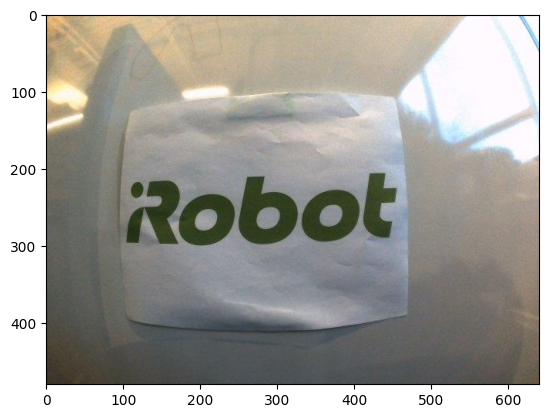

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read image to undistort (cv2.imread() reads image in bgr).
img = cv2.imread("./images/fisheye_camera_image.jpg")
# Show input image converting bgr to rgb.
plt.imshow(img[...,::-1])

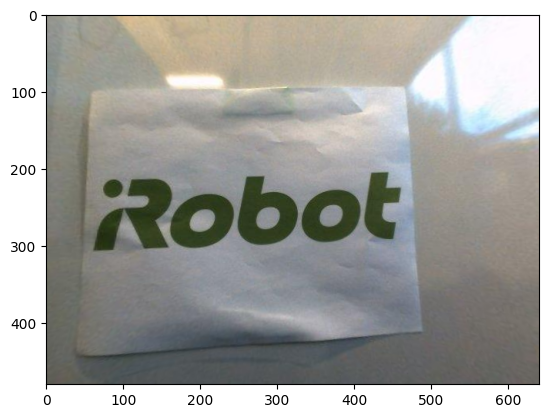

In [8]:
# Camera intrinsic parameters and distortion coefficients.
cameraMatrix = np.array([[288.154, 0, 326.584],[0,288.101,239.849],[0,0,1]]) # [[fx, 0, cx], [0, fy, cy], [0, 0, 1]]
distCoeffs = np.array([[0.173884], [-0.275602], [0.258487], [-0.0808314]]) # [[k1],[k2],[k3],[k4]]

# You should replace these 3 lines with the output in calibration step.
DIM = (img.shape[1], img.shape[0])
K=cameraMatrix
D=distCoeffs

map1, map2 = cv2.fisheye.initUndistortRectifyMap(K, D, np.eye(3), K, DIM, cv2.CV_16SC2)
undistorted_img = cv2.remap(img, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)

# Show undistorted image converting bgr to rgb.
plt.imshow(undistorted_img[...,::-1])


In [7]:
# Store undistorted image.
cv2.imwrite("./images/undistorted.jpg",undistorted_img)

True